In [1]:
import os


from vllm import LLM, SamplingParams
from math_verify import parse, verify

import pandas as pd
from tqdm import tqdm
from transformers import AutoTokenizer

/opt/anaconda/envs/diff-direction/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


INFO 12-08 16:23:01 [__init__.py:241] Automatically detected platform cuda.
WARNING 12-08 16:23:02 [cuda.py:605] Detected different devices in the system: NVIDIA A100 80GB PCIe, NVIDIA A100 80GB PCIe, NVIDIA L40S, NVIDIA L40S. Please make sure to set `CUDA_DEVICE_ORDER=PCI_BUS_ID` to avoid unexpected behavior.


In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [3]:
def verify_answer(ground_truth, response):
    """
    Verify if a response matches the ground truth.
    
    Args:
        ground_truth: The correct answer (will be parsed with $ delimiters)
        response: The model's response to verify
        
    Returns:
        1 if correct, 0 if incorrect
    """
    try:
        ans = parse(response)
    except Exception:
        ans = response
    
    try:
        if verify(parse(f"${ground_truth}$"), ans):
            return 1
        else:
            return 0
    except Exception:
        return 0

def evaluate_responses(responses, ground_truths):
    """
    Evaluate a list of responses against ground truths.
    
    Args:
        responses: List of model responses
        ground_truths: List of correct answers
        
    Returns:
        Tuple of (is_correct_list, accuracy_percentage, num_correct, total)
    """
    is_correct = [verify_answer(gt, resp) for gt, resp in zip(ground_truths, responses)]
    accuracy = sum(is_correct) / len(is_correct) * 100 if is_correct else 0.0
    return is_correct, accuracy, sum(is_correct), len(is_correct)

In [4]:
MODEL_NAME = "Qwen/Qwen2.5-Math-1.5B-Instruct"
MODEL_ALIAS = MODEL_NAME.split("/")[-1]

In [5]:
sample_test_set_path = "../temp/AIME_2025_predicted_by_predicting_learnability.json"

In [10]:
df = pd.read_json(sample_test_set_path)

In [11]:
MATH_PROMPT_FORMATTING = " Please put your final answer inside \\boxed{}."

In [12]:
df["formatted_prompt"] = df["question"].apply(lambda x: x + MATH_PROMPT_FORMATTING)

In [22]:
llm = LLM(model=MODEL_NAME, gpu_memory_utilization=0.4)

INFO 12-08 16:26:24 [utils.py:326] non-default args: {'model': 'Qwen/Qwen2.5-Math-1.5B-Instruct', 'gpu_memory_utilization': 0.4, 'disable_log_stats': True}
INFO 12-08 16:26:53 [__init__.py:711] Resolved architecture: Qwen2ForCausalLM
INFO 12-08 16:26:53 [__init__.py:1750] Using max model len 4096


2025-12-08 16:26:58,227	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


INFO 12-08 16:26:58 [scheduler.py:222] Chunked prefill is enabled with max_num_batched_tokens=8192.
(EngineCore_0 pid=3284160) INFO 12-08 16:27:03 [core.py:636] Waiting for init message from front-end.
(EngineCore_0 pid=3284160) INFO 12-08 16:27:03 [core.py:74] Initializing a V1 LLM engine (v0.10.1.1) with config: model='Qwen/Qwen2.5-Math-1.5B-Instruct', speculative_config=None, tokenizer='Qwen/Qwen2.5-Math-1.5B-Instruct', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config={}, tokenizer_revision=None, trust_remote_code=False, dtype=torch.bfloat16, max_seq_len=4096, download_dir=None, load_format=auto, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, device_config=cuda, decoding_config=DecodingConfig(backend='auto', disable_fallback=False, disable_any_whitespace=False, disable_additional_properties=False, reasoning_backend=''), observability_config=Observabil

Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]
Loading safetensors checkpoint shards: 100% Completed | 1/1 [00:01<00:00,  1.49s/it]
Loading safetensors checkpoint shards: 100% Completed | 1/1 [00:01<00:00,  1.49s/it]
(EngineCore_0 pid=3284160) 


(EngineCore_0 pid=3284160) INFO 12-08 16:27:43 [default_loader.py:262] Loading weights took 1.59 seconds
(EngineCore_0 pid=3284160) INFO 12-08 16:27:44 [gpu_model_runner.py:2007] Model loading took 2.8798 GiB and 29.799867 seconds
(EngineCore_0 pid=3284160) INFO 12-08 16:28:28 [backends.py:548] Using cache directory: /home/lina4335/.cache/vllm/torch_compile_cache/c385231ae6/rank_0_0/backbone for vLLM's torch.compile
(EngineCore_0 pid=3284160) INFO 12-08 16:28:28 [backends.py:559] Dynamo bytecode transform time: 44.23 s
(EngineCore_0 pid=3284160) INFO 12-08 16:28:36 [backends.py:194] Cache the graph for dynamic shape for later use
(EngineCore_0 pid=3284160) INFO 12-08 16:28:59 [backends.py:215] Compiling a graph for dynamic shape takes 30.22 s
(EngineCore_0 pid=3284160) INFO 12-08 16:29:10 [monitor.py:34] torch.compile takes 74.45 s in total
(EngineCore_0 pid=3284160) INFO 12-08 16:29:13 [gpu_worker.py:276] Available KV cache memory: 13.42 GiB
(EngineCore_0 pid=3284160) INFO 12-08 16:29

Capturing CUDA graphs (mixed prefill-decode, PIECEWISE): 100%|██████████| 67/67 [00:03<00:00, 17.35it/s]


(EngineCore_0 pid=3284160) INFO 12-08 16:29:18 [gpu_model_runner.py:2708] Graph capturing finished in 4 secs, took 1.59 GiB
(EngineCore_0 pid=3284160) INFO 12-08 16:29:18 [core.py:214] init engine (profile, create kv cache, warmup model) took 94.53 seconds
INFO 12-08 16:29:19 [llm.py:298] Supported_tasks: ['generate']


In [9]:
# default prompting

In [13]:
PROMPTS = df["formatted_prompt"].to_list()
GTS = df["answer"].to_list()

In [14]:
PARAMS = SamplingParams(temperature=0.0, max_tokens=3000)

In [12]:
outputs = llm.generate(PROMPTS, PARAMS)

Processed prompts:   0%|          | 0/15 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Processed prompts: 100%|██████████| 15/15 [00:04<00:00,  3.06it/s, est. speed input: 358.86 toks/s, output: 2682.63 toks/s]


In [13]:
RESP = []
for output in outputs:
    prompt = output.prompt
    generated_text = output.outputs[0].text
    RESP.append(generated_text)

In [ ]:
# Evaluate responses using reusable function
is_correct, accuracy, num_correct, total = evaluate_responses(RESP, GTS)
print(f"Accuracy: {accuracy:.2f}% ({num_correct}/{total})")


In [46]:
GTS

[70, 588, 16, 117, 279, 504, 821, 77, 62, 81, 259, 510, 204, 60, 735]

In [47]:
is_correct

[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

## 2-Round Inference on All Questions

Now let's perform 2-round inference on all questions. In round 1, we generate an initial answer. In round 2, we ask the model to review and potentially correct its work.

In [ ]:
# Round 1: Generate initial answers
PROMPTS_ROUND1 = df["formatted_prompt"].to_list()
GTS_EASY = df["answer"].to_list()

print("Generating Round 1 responses...")
outputs_round1 = llm.generate(PROMPTS_ROUND1, PARAMS)

RESP_ROUND1 = []
for output in outputs_round1:
    generated_text = output.outputs[0].text
    RESP_ROUND1.append(generated_text)
    
print(f"Completed Round 1 for {len(RESP_ROUND1)} questions")

Generating Round 1 responses...


Processed prompts: 100%|██████████| 15/15 [00:04<00:00,  3.60it/s, est. speed input: 421.80 toks/s, output: 2929.05 toks/s]

Completed Round 1 for 15 questions


In [2]:
import pandas as pd

In [3]:
df = pd.read_parquet("/VData/linna4335/llms_know_difficult/hard_rl/data/MATH/train.parquet")

In [ ]:
# Round 2: Review and correct the work
REVIEW_PROMPT_TEMPLATE = """Original Question: {question}

Your Initial Answer: {initial_answer}

Please carefully review your answer above. Check for any calculation errors, logical mistakes, or incorrect reasoning. If you find any errors, provide a corrected answer. If your answer is correct, restate it.

Please put your final answer inside \\boxed{{}}."""

PROMPTS_ROUND2 = []
for idx, (question, response) in enumerate(zip(df["question"].to_list(), RESP_ROUND1)):
    review_prompt = REVIEW_PROMPT_TEMPLATE.format(
        question=question,
        initial_answer=response
    )
    PROMPTS_ROUND2.append(review_prompt)

print("Generating Round 2 responses (review)...")
outputs_round2 = llm.generate(PROMPTS_ROUND2, PARAMS)

RESP_ROUND2 = []
for output in outputs_round2:
    generated_text = output.outputs[0].text
    RESP_ROUND2.append(generated_text)
    
print(f"Completed Round 2 for {len(RESP_ROUND2)} questions")

Generating Round 2 responses (review)...


Processed prompts:   0%|          | 0/15 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Processed prompts: 100%|██████████| 15/15 [00:11<00:00,  1.34it/s, est. speed input: 1308.23 toks/s, output: 3399.34 toks/s]

Completed Round 2 for 15 questions


In [ ]:
# Evaluate Round 1 results
is_correct_round1, accuracy_round1, num_correct_r1, total_r1 = evaluate_responses(RESP_ROUND1, GTS_EASY)
print(f"Round 1 Accuracy: {accuracy_round1:.2f}% ({num_correct_r1}/{total_r1})")

Round 1 Accuracy: 13.33% (2/15)


In [ ]:
# Evaluate Round 2 results
is_correct_round2, accuracy_round2, num_correct_r2, total_r2 = evaluate_responses(RESP_ROUND2, GTS_EASY)
print(f"Round 2 Accuracy: {accuracy_round2:.2f}% ({num_correct_r2}/{total_r2})")

Round 2 Accuracy: 13.33% (2/15)


In [ ]:
# Compare results and identify improvements
results_comparison = []
for idx in range(len(is_correct_round1)):
    result = {
        'question_idx': idx,
        'predicted_difficulty': df.iloc[idx]['predicted_difficulty_sigmoid'],
        'round1_correct': is_correct_round1[idx],
        'round2_correct': is_correct_round2[idx],
        'improved': is_correct_round2[idx] > is_correct_round1[idx],
        'degraded': is_correct_round2[idx] < is_correct_round1[idx]
    }
    results_comparison.append(result)

comparison_df = pd.DataFrame(results_comparison)

# Summary statistics
num_improved = comparison_df['improved'].sum()
num_degraded = comparison_df['degraded'].sum()
num_unchanged = len(comparison_df) - num_improved - num_degraded

print(f"\n=== 2-Round Inference Results ===")
print(f"Round 1 Accuracy: {accuracy_round1:.2f}%")
print(f"Round 2 Accuracy: {accuracy_round2:.2f}%")
print(f"Improvement: {accuracy_round2 - accuracy_round1:.2f} percentage points")
print(f"\nQuestions improved by review: {num_improved}")
print(f"Questions degraded by review: {num_degraded}")
print(f"Questions unchanged: {num_unchanged}")


=== 2-Round Inference Results ===
Round 1 Accuracy: 13.33%
Round 2 Accuracy: 13.33%
Improvement: 0.00 percentage points

Questions improved by review: 0
Questions degraded by review: 0
Questions unchanged: 15


In [57]:
# Display comparison dataframe
comparison_df

,question_idx,predicted_difficulty,round1_correct,round2_correct,improved,degraded
0,0,0.085126,0,0,False,False
1,1,0.185826,0,0,False,False
2,2,0.199134,0,0,False,False
3,3,0.224215,0,0,False,False
4,4,0.230331,0,0,False,False
5,5,0.230922,0,0,False,False
6,6,0.244214,0,0,False,False
7,7,0.257724,0,0,False,False
8,8,0.303385,0,0,False,False
9,9,0.331925,0,0,False,False


In [ ]:
# Examine examples where the model improved its answer
improved_indices = comparison_df[comparison_df['improved']]['question_idx'].tolist()

if improved_indices:
    print(f"=== Example of Improved Answer ===")
    idx = improved_indices[0]
    print(f"\nQuestion: {df.iloc[idx]['question'][:200]}...")
    print(f"\nGround Truth: {GTS_EASY[idx]}")
    print(f"\nRound 1 Answer (Incorrect):\n{RESP_ROUND1[idx][:300]}...")
    print(f"\nRound 2 Answer (Correct):\n{RESP_ROUND2[idx][:300]}...")
else:
    print("No improved answers found.")

No improved answers found.


In [ ]:
# Examine examples where the model degraded its answer
degraded_indices = comparison_df[comparison_df['degraded']]['question_idx'].tolist()

if degraded_indices:
    print(f"=== Example of Degraded Answer ===")
    idx = degraded_indices[0]
    print(f"\nQuestion: {df.iloc[idx]['question'][:200]}...")
    print(f"\nGround Truth: {GTS_EASY[idx]}")
    print(f"\nRound 1 Answer (Correct):\n{RESP_ROUND1[idx][:300]}...")
    print(f"\nRound 2 Answer (Incorrect):\n{RESP_ROUND2[idx][:300]}...")
else:
    print("No degraded answers found.")

No degraded answers found.


## Gating to solve harder questions

In [19]:
# Select harder questions (high predicted difficulty)
df_sorted_hard = df.sort_values('predicted_difficulty_sigmoid', ascending=True)
df_hard = df_sorted_hard.head(3)  # Adjust to select subset

print(f"Total questions: {len(df)}")
print(f"Questions selected for hard question strategies: {len(df_hard)}")
print(f"Predicted difficulty range: {df_hard['predicted_difficulty_sigmoid'].min():.4f} - {df_hard['predicted_difficulty_sigmoid'].max():.4f}")

Total questions: 15
Questions selected for hard question strategies: 3
Predicted difficulty range: 0.1669 - 0.1856


In [20]:
df_hard

,question,answer,predicted_difficulty,predicted_difficulty_sigmoid,formatted_prompt
0,Find the sum of all integer bases $b>9$ for wh...,70,-1.607902,0.166880,Find the sum of all integer bases $b>9$ for wh...
12,Alex divides a disk into four quadrants with t...,204,-1.550420,0.175026,Alex divides a disk into four quadrants with t...
3,"Find the number of ordered pairs $(x,y)$, wher...",117,-1.479053,0.185571,"Find the number of ordered pairs $(x,y)$, wher..."


### Strategy 1: Multi-Sample with Majority Vote
Generate multiple solutions and take the majority answer

In [23]:
# Strategy 1: Generate multiple samples and use majority voting
NUM_SAMPLES = 5
PARAMS_SAMPLING = SamplingParams(temperature=0.7, max_tokens=3000, top_p=0.95)

PROMPTS_HARD = df_hard["formatted_prompt"].to_list()
GTS_HARD = df_hard["answer"].to_list()

# Replicate each prompt NUM_SAMPLES times
prompts_repeated = []
question_indices = []
for idx, prompt in enumerate(PROMPTS_HARD):
    for _ in range(NUM_SAMPLES):
        prompts_repeated.append(prompt)
        question_indices.append(idx)

print(f"Generating {len(prompts_repeated)} responses ({NUM_SAMPLES} per question)...")
outputs_majority = llm.generate(prompts_repeated, PARAMS_SAMPLING)

# Collect responses
responses_by_question = [[] for _ in range(len(PROMPTS_HARD))]
for output, q_idx in zip(outputs_majority, question_indices):
    text = output.outputs[0].text
    responses_by_question[q_idx].append(text)

print(f"Generated {NUM_SAMPLES} samples for {len(PROMPTS_HARD)} questions")

Generating 15 responses (5 per question)...


Processed prompts: 100%|██████████| 15/15 [00:11<00:00,  1.34it/s, est. speed input: 85.06 toks/s, output: 967.46 toks/s] 

Generated 5 samples for 3 questions


In [24]:
# Parse all responses and find majority answer
from collections import Counter

majority_answers = []
is_correct_majority = []

for q_idx, responses in enumerate(responses_by_question):
    # Parse all responses for this question
    parsed_responses = []
    for resp in responses:
        try:
            ans = parse(resp)
        except Exception:
            ans = resp
        parsed_responses.append(str(ans))  # Convert to string for counting
    
    # Find majority answer
    if parsed_responses:
        answer_counts = Counter(parsed_responses)
        majority_answer = answer_counts.most_common(1)[0][0]
        majority_answers.append(majority_answer)
        is_correct_majority.append(verify_answer(GTS_HARD[q_idx], majority_answer))
    else:
        majority_answers.append("")
        is_correct_majority.append(0)

accuracy_majority = sum(is_correct_majority) / len(is_correct_majority) * 100
print(f"Strategy 1 - Majority Vote Accuracy: {accuracy_majority:.2f}% ({sum(is_correct_majority)}/{len(is_correct_majority)})")

Strategy 1 - Majority Vote Accuracy: 0.00% (0/3)


### Strategy 2: Chain-of-Thought with Self-Verification
Ask model to solve, then verify its own work step-by-step

In [25]:
# Strategy 2: Chain-of-thought with self-verification
COT_PROMPT_TEMPLATE = """{question}

Let's approach this step-by-step:
1) First, identify what the problem is asking
2) Work through the solution carefully
3) Check your work by verifying each step
4) Provide your final answer

Please put your final answer inside \\boxed{{}}."""

PROMPTS_COT = [COT_PROMPT_TEMPLATE.format(question=q) for q in df_hard["question"].to_list()]

print("Generating Chain-of-Thought responses...")
outputs_cot = llm.generate(PROMPTS_COT, PARAMS)

RESP_COT = [output.outputs[0].text for output in outputs_cot]
print(f"Completed CoT generation for {len(RESP_COT)} questions")

Generating Chain-of-Thought responses...


Processed prompts: 100%|██████████| 3/3 [00:18<00:00,  6.19s/it, est. speed input: 17.39 toks/s, output: 237.59 toks/s]

Completed CoT generation for 3 questions


In [26]:
# Evaluate CoT results
is_correct_cot, accuracy_cot, num_correct_cot, total_cot = evaluate_responses(RESP_COT, GTS_HARD)
print(f"Strategy 2 - Chain-of-Thought Accuracy: {accuracy_cot:.2f}% ({num_correct_cot}/{total_cot})")

Strategy 2 - Chain-of-Thought Accuracy: 33.33% (1/3)


### Strategy 3: Multi-Step Verification with Reflection
Generate answer, then ask model to verify and correct if needed (like 2-round but with explicit verification prompt)

In [27]:
# Strategy 3: Multi-step with explicit verification
# Step 1: Generate initial solution
print("Step 1: Generating initial solutions...")
outputs_step1 = llm.generate(PROMPTS_HARD, PARAMS)
RESP_STEP1 = [output.outputs[0].text for output in outputs_step1]

# Step 2: Ask model to verify and critique its own work
VERIFY_PROMPT_TEMPLATE = """Original Question: {question}

Proposed Solution: {solution}

Now, please act as a mathematical reviewer. Carefully verify the solution above:
1) Check if all steps are logically sound
2) Verify all calculations are correct
3) Confirm the final answer makes sense given the problem
4) If you find any errors, provide the corrected solution

Provide your final verified answer inside \\boxed{{}}."""

PROMPTS_VERIFY = []
for q, sol in zip(df_hard["question"].to_list(), RESP_STEP1):
    PROMPTS_VERIFY.append(VERIFY_PROMPT_TEMPLATE.format(question=q, solution=sol))

print("Step 2: Verifying and correcting solutions...")
outputs_verify = llm.generate(PROMPTS_VERIFY, PARAMS)
RESP_VERIFIED = [output.outputs[0].text for output in outputs_verify]

print(f"Completed multi-step verification for {len(RESP_VERIFIED)} questions")

Step 1: Generating initial solutions...


Processed prompts: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it, est. speed input: 42.91 toks/s, output: 416.65 toks/s]


Step 2: Verifying and correcting solutions...


Processed prompts: 100%|██████████| 3/3 [00:19<00:00,  6.52s/it, est. speed input: 114.21 toks/s, output: 337.67 toks/s]

Completed multi-step verification for 3 questions


In [28]:
# Evaluate verification strategy results
is_correct_verified, accuracy_verified, num_correct_verified, total_verified = evaluate_responses(RESP_VERIFIED, GTS_HARD)
print(f"Strategy 3 - Multi-Step Verification Accuracy: {accuracy_verified:.2f}% ({num_correct_verified}/{total_verified})")

Strategy 3 - Multi-Step Verification Accuracy: 33.33% (1/3)


### Strategy 4: Ensemble - Best of All Strategies
For each question, use the answer from whichever strategy got it correct (simulating picking the best approach)

In [29]:
# Strategy 4: Ensemble - use any strategy that got it correct
is_correct_ensemble = []
for idx in range(len(GTS_HARD)):
    # If any strategy got it correct, mark as correct
    strategies_correct = [
        is_correct_majority[idx],
        is_correct_cot[idx],
        is_correct_verified[idx]
    ]
    is_correct_ensemble.append(1 if any(strategies_correct) else 0)

accuracy_ensemble = sum(is_correct_ensemble) / len(is_correct_ensemble) * 100
print(f"Strategy 4 - Ensemble (Any Correct) Accuracy: {accuracy_ensemble:.2f}% ({sum(is_correct_ensemble)}/{len(is_correct_ensemble)})")

Strategy 4 - Ensemble (Any Correct) Accuracy: 33.33% (1/3)


### Results Summary

In [30]:
# Compare all strategies
results_summary = pd.DataFrame({
    'Strategy': ['Majority Vote (5 samples)', 'Chain-of-Thought', 'Multi-Step Verification', 'Ensemble (Any Correct)'],
    'Accuracy': [accuracy_majority, accuracy_cot, accuracy_verified, accuracy_ensemble],
    'Correct': [sum(is_correct_majority), sum(is_correct_cot), sum(is_correct_verified), sum(is_correct_ensemble)],
    'Total': [len(is_correct_majority), len(is_correct_cot), len(is_correct_verified), len(is_correct_ensemble)]
})

print("\n" + "="*60)
print("HARD QUESTIONS STRATEGY COMPARISON")
print("="*60)
print(results_summary.to_string(index=False))
print("="*60)


HARD QUESTIONS STRATEGY COMPARISON
                 Strategy  Accuracy  Correct  Total
Majority Vote (5 samples)  0.000000        0      3
         Chain-of-Thought 33.333333        1      3
  Multi-Step Verification 33.333333        1      3
   Ensemble (Any Correct) 33.333333        1      3


In [31]:
# Analyze which questions each strategy solved
strategy_comparison = pd.DataFrame({
    'question_idx': range(len(GTS_HARD)),
    'predicted_difficulty': df_hard['predicted_difficulty_sigmoid'].values,
    'majority_vote': is_correct_majority,
    'chain_of_thought': is_correct_cot,
    'verification': is_correct_verified,
    'any_correct': is_correct_ensemble
})

# Count unique solutions per strategy
strategy_comparison['num_strategies_correct'] = (
    strategy_comparison['majority_vote'] + 
    strategy_comparison['chain_of_thought'] + 
    strategy_comparison['verification']
)

print("\nQuestions solved by number of strategies:")
print(strategy_comparison['num_strategies_correct'].value_counts().sort_index())

# Show questions that only one strategy solved
unique_solutions = strategy_comparison[strategy_comparison['num_strategies_correct'] == 1]
if len(unique_solutions) > 0:
    print(f"\n{len(unique_solutions)} questions solved by only ONE strategy (showing strategy complementarity)")


Questions solved by number of strategies:
num_strategies_correct
0    2
2    1
Name: count, dtype: int64


In [32]:
strategy_comparison

,question_idx,predicted_difficulty,majority_vote,chain_of_thought,verification,any_correct,num_strategies_correct
0,0,0.166880,0,1,1,1,2
1,1,0.175026,0,0,0,0,0
2,2,0.185571,0,0,0,0,0


### Optional: Using a Stronger Model as Verifier

If you have access to a stronger model (e.g., Qwen2.5-Math-7B), you can load it to verify answers from the weaker model

In [42]:
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
STRONG_MODEL_NAME = "Qwen/Qwen2.5-Math-7B-Instruct"
llm_strong = LLM(model=STRONG_MODEL_NAME, gpu_memory_utilization=0.4)

VERIFIER_PROMPT_TEMPLATE = """Question: {question}

A student provided this solution:
{weak_solution}

As an expert mathematician, please:
1) Verify if the solution is correct
2) If incorrect, provide the correct solution
3) If correct but can be improved, provide a clearer version

Please put your final answer inside \\boxed{{}}."""

# Use strong model to verify weak model's answers
PROMPTS_STRONG_VERIFY = []
for q, weak_sol in zip(df_hard["question"].to_list(), RESP_STEP1):
    prompt = VERIFIER_PROMPT_TEMPLATE.format(question=q, weak_solution=weak_sol)
    PROMPTS_STRONG_VERIFY.append(prompt)

print("Using stronger model to verify solutions...")
outputs_strong = llm_strong.generate(PROMPTS_STRONG_VERIFY, PARAMS)
RESP_STRONG_VERIFIED = [output.outputs[0].text for output in outputs_strong]

# Evaluate strong model verification
is_correct_strong = []
for idx, response in enumerate(RESP_STRONG_VERIFIED):
    try:
        ans = parse(response)
    except Exception:
        ans = response
    try:
        if verify(parse(f"${GTS_HARD[idx]}$"), ans):
            is_correct_strong.append(1)
        else:
            is_correct_strong.append(0)
    except Exception:
        is_correct_strong.append(0)

accuracy_strong = sum(is_correct_strong) / len(is_correct_strong) * 100
print(f"Strong Model Verification Accuracy: {accuracy_strong:.2f}% ({sum(is_correct_strong)}/{len(is_correct_strong)})")


INFO 12-08 16:33:59 [utils.py:326] non-default args: {'model': 'Qwen/Qwen2.5-Math-7B-Instruct', 'gpu_memory_utilization': 0.4, 'disable_log_stats': True}
INFO 12-08 16:33:59 [__init__.py:711] Resolved architecture: Qwen2ForCausalLM
INFO 12-08 16:33:59 [__init__.py:1750] Using max model len 4096


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

INFO 12-08 16:34:00 [scheduler.py:222] Chunked prefill is enabled with max_num_batched_tokens=8192.
(EngineCore_0 pid=3292863) INFO 12-08 16:34:01 [core.py:636] Waiting for init message from front-end.
(EngineCore_0 pid=3292863) INFO 12-08 16:34:01 [core.py:74] Initializing a V1 LLM engine (v0.10.1.1) with config: model='Qwen/Qwen2.5-Math-7B-Instruct', speculative_config=None, tokenizer='Qwen/Qwen2.5-Math-7B-Instruct', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config={}, tokenizer_revision=None, trust_remote_code=False, dtype=torch.bfloat16, max_seq_len=4096, download_dir=None, load_format=auto, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, device_config=cuda, decoding_config=DecodingConfig(backend='auto', disable_fallback=False, disable_any_whitespace=False, disable_additional_properties=False, reasoning_backend=''), observability_config=ObservabilityC

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


(EngineCore_0 pid=3292863) INFO 12-08 16:34:05 [parallel_state.py:1134] rank 0 in world size 1 is assigned as DP rank 0, PP rank 0, TP rank 0, EP rank 0
(EngineCore_0 pid=3292863) WARNING 12-08 16:34:05 [topk_topp_sampler.py:61] FlashInfer is not available. Falling back to the PyTorch-native implementation of top-p & top-k sampling. For the best performance, please install FlashInfer.
(EngineCore_0 pid=3292863) INFO 12-08 16:34:05 [gpu_model_runner.py:1953] Starting to load model Qwen/Qwen2.5-Math-7B-Instruct...
(EngineCore_0 pid=3292863) INFO 12-08 16:34:06 [gpu_model_runner.py:1985] Loading model from scratch...
(EngineCore_0 pid=3292863) INFO 12-08 16:34:06 [cuda.py:328] Using Flash Attention backend on V1 engine.
(EngineCore_0 pid=3292863) INFO 12-08 16:34:06 [weight_utils.py:296] Using model weights format ['*.safetensors']
(EngineCore_0 pid=3292863) INFO 12-08 16:36:04 [weight_utils.py:312] Time spent downloading weights for Qwen/Qwen2.5-Math-7B-Instruct: 118.152094 seconds


Loading safetensors checkpoint shards:   0% Completed | 0/4 [00:00<?, ?it/s]
Loading safetensors checkpoint shards:  25% Completed | 1/4 [00:01<00:04,  1.64s/it]
Loading safetensors checkpoint shards:  50% Completed | 2/4 [00:09<00:10,  5.11s/it]
Loading safetensors checkpoint shards:  75% Completed | 3/4 [00:20<00:07,  7.83s/it]
Loading safetensors checkpoint shards: 100% Completed | 4/4 [00:26<00:00,  7.39s/it]
Loading safetensors checkpoint shards: 100% Completed | 4/4 [00:26<00:00,  6.74s/it]
(EngineCore_0 pid=3292863) 


(EngineCore_0 pid=3292863) INFO 12-08 16:36:32 [default_loader.py:262] Loading weights took 27.18 seconds
(EngineCore_0 pid=3292863) INFO 12-08 16:36:33 [gpu_model_runner.py:2007] Model loading took 14.2419 GiB and 146.514339 seconds
(EngineCore_0 pid=3292863) INFO 12-08 16:36:45 [backends.py:548] Using cache directory: /home/lina4335/.cache/vllm/torch_compile_cache/f94ea8e1e0/rank_0_0/backbone for vLLM's torch.compile
(EngineCore_0 pid=3292863) INFO 12-08 16:36:45 [backends.py:559] Dynamo bytecode transform time: 11.37 s
(EngineCore_0 pid=3292863) INFO 12-08 16:36:52 [backends.py:194] Cache the graph for dynamic shape for later use
(EngineCore_0 pid=3292863) INFO 12-08 16:37:15 [backends.py:215] Compiling a graph for dynamic shape takes 29.31 s
(EngineCore_0 pid=3292863) INFO 12-08 16:37:26 [monitor.py:34] torch.compile takes 40.68 s in total
(EngineCore_0 pid=3292863) INFO 12-08 16:37:27 [gpu_worker.py:276] Available KV cache memory: 2.02 GiB
(EngineCore_0 pid=3292863) INFO 12-08 16:

Capturing CUDA graphs (mixed prefill-decode, PIECEWISE): 100%|██████████| 67/67 [00:04<00:00, 14.65it/s]


(EngineCore_0 pid=3292863) INFO 12-08 16:37:32 [gpu_model_runner.py:2708] Graph capturing finished in 5 secs, took 1.61 GiB
(EngineCore_0 pid=3292863) INFO 12-08 16:37:32 [core.py:214] init engine (profile, create kv cache, warmup model) took 58.91 seconds
INFO 12-08 16:37:33 [llm.py:298] Supported_tasks: ['generate']
Using stronger model to verify solutions...


Processed prompts: 100%|██████████| 3/3 [00:12<00:00,  4.05s/it, est. speed input: 179.43 toks/s, output: 122.64 toks/s]

Strong Model Verification Accuracy: 33.33% (1/3)


In [43]:
## Agent-Based Model Routing Framework
# Router agent to decide which model/strategy to use based on question difficulty

In [44]:
from dataclasses import dataclass
from typing import Literal, Optional, Callable
from enum import Enum

class DifficultyLevel(Enum):
    EASY = "easy"
    MEDIUM = "medium"
    HARD = "hard"
    VERY_HARD = "very_hard"

class SolverStrategy(Enum):
    DIRECT = "direct"
    COT = "chain_of_thought"
    MULTI_SAMPLE = "multi_sample"
    SELF_VERIFY = "self_verify"
    STRONG_MODEL = "strong_model"

@dataclass
class SolverConfig:
    """Configuration for a solver strategy"""
    strategy: SolverStrategy
    model_name: str
    temperature: float
    num_samples: int = 1
    use_verification: bool = False
    
@dataclass
class Question:
    """Question with metadata"""
    text: str
    ground_truth: str
    difficulty_score: float
    index: int
    
@dataclass
class SolverResult:
    """Result from solving a question"""
    question_idx: int
    strategy_used: SolverStrategy
    response: str
    is_correct: int
    difficulty_level: DifficultyLevel
    num_attempts: int = 1

In [45]:
class DifficultyRouter:
    """Routes questions to appropriate solving strategies based on difficulty.
    
    Note: difficulty_score is a SUCCESS RATE prediction (0-1):
    - Higher values (e.g., 0.8) = EASIER questions (high predicted success)
    - Lower values (e.g., 0.2) = HARDER questions (low predicted success)
    """
    
    def __init__(self, very_hard_threshold=0.15, hard_threshold=0.4, medium_threshold=0.7):
        """
        Args:
            very_hard_threshold: Below this success rate = very hard (use strong model)
            hard_threshold: Below this success rate = hard (use multi-sample)
            medium_threshold: Below this success rate = medium (use CoT)
            Above medium_threshold = easy (direct solve)
        """
        self.very_hard_threshold = very_hard_threshold
        self.hard_threshold = hard_threshold
        self.medium_threshold = medium_threshold
        
    def classify_difficulty(self, difficulty_score: float) -> DifficultyLevel:
        """Classify question difficulty based on predicted success rate.
        
        Lower success rate = harder question
        """
        if difficulty_score < self.very_hard_threshold:
            return DifficultyLevel.VERY_HARD
        elif difficulty_score < self.hard_threshold:
            return DifficultyLevel.HARD
        elif difficulty_score < self.medium_threshold:
            return DifficultyLevel.MEDIUM
        else:
            return DifficultyLevel.EASY
    
    def route(self, question: Question) -> SolverConfig:
        """Route question to appropriate solver based on difficulty"""
        difficulty = self.classify_difficulty(question.difficulty_score)
        
        if difficulty == DifficultyLevel.EASY:
            # Easy questions (high success rate): direct solve with weak model
            return SolverConfig(
                strategy=SolverStrategy.DIRECT,
                model_name="weak",
                temperature=0.0,
                num_samples=1,
                use_verification=False
            )
        elif difficulty == DifficultyLevel.MEDIUM:
            # Medium questions (moderate success rate): CoT with weak model
            return SolverConfig(
                strategy=SolverStrategy.COT,
                model_name="weak",
                temperature=0.0,
                num_samples=1,
                use_verification=False
            )
        elif difficulty == DifficultyLevel.HARD:
            # Hard questions (low success rate): Multi-sample with verification
            return SolverConfig(
                strategy=SolverStrategy.MULTI_SAMPLE,
                model_name="weak",
                temperature=0.7,
                num_samples=5,
                use_verification=True
            )
        else:  # VERY_HARD
            # Very hard (very low success rate): Use strong model with verification
            return SolverConfig(
                strategy=SolverStrategy.STRONG_MODEL,
                model_name="strong",
                temperature=0.0,
                num_samples=1,
                use_verification=True
            )

# Initialize router with corrected thresholds (lower = harder)
router = DifficultyRouter(very_hard_threshold=0.15, hard_threshold=0.4, medium_threshold=0.7)
print("Difficulty Router initialized with SUCCESS RATE thresholds:")
print(f"  Very Hard: success rate < {0.15}")
print(f"  Hard: success rate < {0.4}")
print(f"  Medium: success rate < {0.7}")
print(f"  Easy: success rate >= {0.7}")

Difficulty Router initialized with SUCCESS RATE thresholds:
  Very Hard: success rate < 0.15
  Hard: success rate < 0.4
  Medium: success rate < 0.7
  Easy: success rate >= 0.7


In [46]:
class SolverAgent:
    """Agent that executes different solving strategies"""
    
    def __init__(self, weak_model: LLM, strong_model: Optional[LLM] = None):
        self.weak_model = weak_model
        self.strong_model = strong_model
        self.cot_template = """{question}

Let's approach this step-by-step:
1) First, identify what the problem is asking
2) Work through the solution carefully
3) Check your work by verifying each step
4) Provide your final answer

Please put your final answer inside \\boxed{{}}."""

        self.verify_template = """Original Question: {question}

Proposed Solution: {solution}

Now, please act as a mathematical reviewer. Carefully verify the solution above:
1) Check if all steps are logically sound
2) Verify all calculations are correct
3) Confirm the final answer makes sense given the problem
4) If you find any errors, provide the corrected solution

Provide your final verified answer inside \\boxed{{}}."""

    def solve_direct(self, question: Question, config: SolverConfig) -> str:
        """Direct solve without special prompting"""
        prompt = question.text + " Please put your final answer inside \\boxed{}."
        params = SamplingParams(temperature=config.temperature, max_tokens=3000)
        model = self.strong_model if config.model_name == "strong" else self.weak_model
        output = model.generate([prompt], params)[0]
        return output.outputs[0].text
    
    def solve_cot(self, question: Question, config: SolverConfig) -> str:
        """Solve with chain-of-thought prompting"""
        prompt = self.cot_template.format(question=question.text)
        params = SamplingParams(temperature=config.temperature, max_tokens=3000)
        model = self.strong_model if config.model_name == "strong" else self.weak_model
        output = model.generate([prompt], params)[0]
        return output.outputs[0].text
    
    def solve_multi_sample(self, question: Question, config: SolverConfig) -> str:
        """Solve with multiple samples and majority vote"""
        prompt = question.text + " Please put your final answer inside \\boxed{}."
        params = SamplingParams(temperature=config.temperature, max_tokens=3000, top_p=0.95)
        model = self.strong_model if config.model_name == "strong" else self.weak_model
        
        # Generate multiple samples
        prompts = [prompt] * config.num_samples
        outputs = model.generate(prompts, params)
        
        # Parse and find majority
        from collections import Counter
        parsed_answers = []
        for output in outputs:
            try:
                ans = parse(output.outputs[0].text)
            except:
                ans = output.outputs[0].text
            parsed_answers.append(str(ans))
        
        # Return majority answer (or first if no clear majority)
        if parsed_answers:
            majority = Counter(parsed_answers).most_common(1)[0][0]
            # Return the full response of the first occurrence of majority answer
            for i, ans in enumerate(parsed_answers):
                if ans == majority:
                    return outputs[i].outputs[0].text
        return outputs[0].outputs[0].text
    
    def solve_with_verification(self, question: Question, config: SolverConfig, initial_response: str) -> str:
        """Verify and potentially correct an initial solution"""
        prompt = self.verify_template.format(question=question.text, solution=initial_response)
        params = SamplingParams(temperature=0.0, max_tokens=3000)
        model = self.strong_model if config.model_name == "strong" else self.weak_model
        output = model.generate([prompt], params)[0]
        return output.outputs[0].text
    
    def solve(self, question: Question, config: SolverConfig) -> str:
        """Main solve method that routes to appropriate strategy"""
        # Get initial solution
        if config.strategy == SolverStrategy.DIRECT:
            response = self.solve_direct(question, config)
        elif config.strategy == SolverStrategy.COT:
            response = self.solve_cot(question, config)
        elif config.strategy == SolverStrategy.MULTI_SAMPLE:
            response = self.solve_multi_sample(question, config)
        elif config.strategy == SolverStrategy.STRONG_MODEL:
            response = self.solve_direct(question, config)
        else:
            response = self.solve_direct(question, config)
        
        # Apply verification if configured
        if config.use_verification:
            response = self.solve_with_verification(question, config, response)
        
        return response

# Initialize agent with models
agent = SolverAgent(weak_model=llm, strong_model=llm_strong if 'llm_strong' in locals() else None)
print("Solver Agent initialized")

Solver Agent initialized


In [47]:
class AgenticSolver:
    """Main orchestrator that coordinates routing and solving"""
    
    def __init__(self, router: DifficultyRouter, agent: SolverAgent):
        self.router = router
        self.agent = agent
        self.results = []
        
    def solve_question(self, question: Question) -> SolverResult:
        """Solve a single question using agent-based routing"""
        # Route to appropriate strategy
        config = self.router.route(question)
        difficulty = self.router.classify_difficulty(question.difficulty_score)
        
        # Solve using selected strategy
        response = self.agent.solve(question, config)
        
        # Verify answer
        is_correct = verify_answer(question.ground_truth, response)
        
        # Create result
        result = SolverResult(
            question_idx=question.index,
            strategy_used=config.strategy,
            response=response,
            is_correct=is_correct,
            difficulty_level=difficulty,
            num_attempts=config.num_samples
        )
        
        return result
    
    def solve_batch(self, questions: list[Question], verbose: bool = True) -> list[SolverResult]:
        """Solve a batch of questions"""
        results = []
        
        for question in tqdm(questions, desc="Solving with agent", disable=not verbose):
            result = self.solve_question(question)
            results.append(result)
        
        self.results = results
        return results
    
    def get_summary(self) -> pd.DataFrame:
        """Get summary statistics of solving results"""
        if not self.results:
            return pd.DataFrame()
        
        summary_data = []
        for difficulty_level in DifficultyLevel:
            level_results = [r for r in self.results if r.difficulty_level == difficulty_level]
            if level_results:
                accuracy = sum(r.is_correct for r in level_results) / len(level_results) * 100
                strategy_counts = {}
                for r in level_results:
                    strategy_counts[r.strategy_used.value] = strategy_counts.get(r.strategy_used.value, 0) + 1
                
                summary_data.append({
                    'Difficulty': difficulty_level.value,
                    'Count': len(level_results),
                    'Accuracy': accuracy,
                    'Correct': sum(r.is_correct for r in level_results),
                    'Primary_Strategy': max(strategy_counts, key=strategy_counts.get),
                })
        
        return pd.DataFrame(summary_data)

# Initialize the agentic solver
agentic_solver = AgenticSolver(router=router, agent=agent)
print("Agentic Solver initialized and ready")

Agentic Solver initialized and ready


### Run Agentic Solver on Questions

In [48]:
# Prepare questions from dataframe
questions = []
for idx, row in df.iterrows():
    question = Question(
        text=row['question'],
        ground_truth=row['answer'],
        difficulty_score=row['predicted_difficulty_sigmoid'],
        index=idx
    )
    questions.append(question)

print(f"Prepared {len(questions)} questions for agentic solving")

# Show routing distribution
difficulty_counts = {}
for q in questions:
    config = router.route(q)
    difficulty = router.classify_difficulty(q.difficulty_score)
    key = f"{difficulty.value} -> {config.strategy.value}"
    difficulty_counts[key] = difficulty_counts.get(key, 0) + 1

print("\nRouting distribution:")
for key, count in sorted(difficulty_counts.items()):
    print(f"  {key}: {count} questions")

Prepared 15 questions for agentic solving

Routing distribution:
  hard -> multi_sample: 12 questions
  medium -> chain_of_thought: 3 questions


In [49]:
# Solve questions using agentic approach
print("Starting agentic solving...")
agentic_results = agentic_solver.solve_batch(questions, verbose=True)
print(f"\nCompleted solving {len(agentic_results)} questions")

Starting agentic solving...


Solving with agent: 100%|██████████| 15/15 [06:19<00:00, 25.29s/it]


Completed solving 15 questions


In [50]:
# Get summary by difficulty level
summary_df = agentic_solver.get_summary()

print("\n" + "="*70)
print("AGENTIC SOLVER RESULTS BY DIFFICULTY")
print("="*70)
print(summary_df.to_string(index=False))
print("="*70)

# Overall accuracy
total_correct = sum(r.is_correct for r in agentic_results)
total_questions = len(agentic_results)
overall_accuracy = total_correct / total_questions * 100
print(f"\nOverall Accuracy: {overall_accuracy:.2f}% ({total_correct}/{total_questions})")


AGENTIC SOLVER RESULTS BY DIFFICULTY
Difficulty  Count  Accuracy  Correct Primary_Strategy
    medium      3       0.0        0 chain_of_thought
      hard     12      25.0        3     multi_sample

Overall Accuracy: 20.00% (3/15)


In [55]:
df["predicted_difficulty"].describe()

count    15.000000
mean     -0.942921
std       0.432251
min      -1.607902
25%      -1.290675
50%      -0.886211
75%      -0.758806
max      -0.308533
Name: predicted_difficulty, dtype: float64

In [51]:
# Detailed results dataframe
agentic_results_df = pd.DataFrame([
    {
        'question_idx': r.question_idx,
        'difficulty_score': questions[r.question_idx].difficulty_score,
        'difficulty_level': r.difficulty_level.value,
        'strategy': r.strategy_used.value,
        'is_correct': r.is_correct,
        'num_attempts': r.num_attempts
    }
    for r in agentic_results
])

agentic_results_df

,question_idx,difficulty_score,difficulty_level,strategy,is_correct,num_attempts
0,0,0.166880,hard,multi_sample,0,5
1,1,0.194431,hard,multi_sample,0,5
2,2,0.327035,hard,multi_sample,1,5
3,3,0.185571,hard,multi_sample,0,5
4,4,0.301857,hard,multi_sample,0,5
5,5,0.269317,hard,multi_sample,1,5
6,6,0.423473,medium,chain_of_thought,0,1
7,7,0.238689,hard,multi_sample,0,5
8,8,0.308362,hard,multi_sample,1,5
9,9,0.310884,hard,multi_sample,0,5


### Visualize Agent Performance

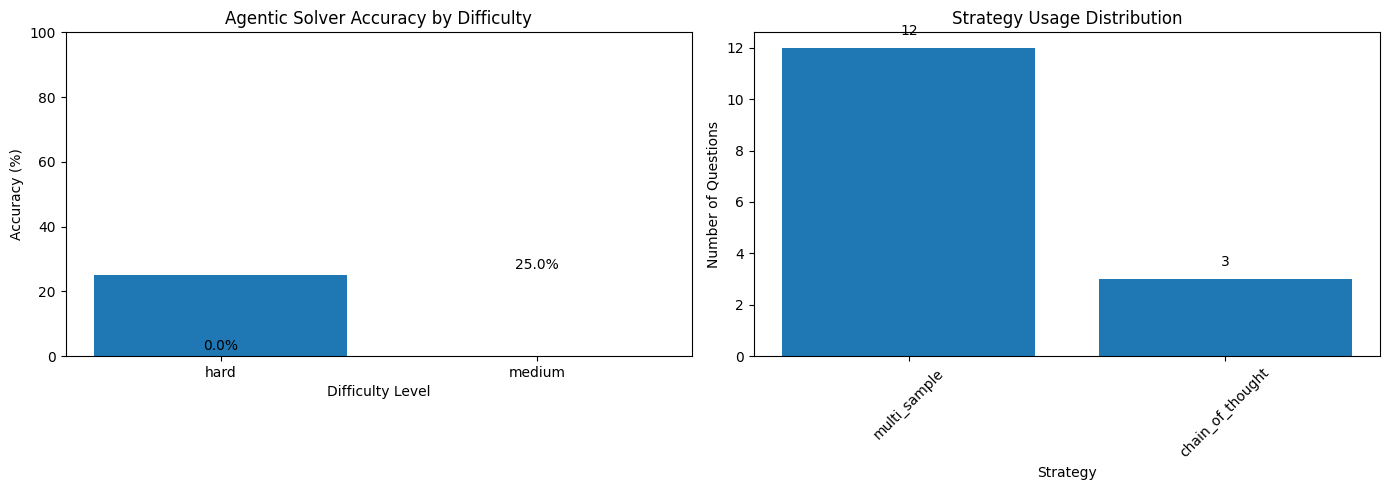

Agent performance visualized


In [52]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Accuracy by difficulty level
summary_df_sorted = summary_df.sort_values('Difficulty')
axes[0].bar(summary_df_sorted['Difficulty'], summary_df_sorted['Accuracy'])
axes[0].set_xlabel('Difficulty Level')
axes[0].set_ylabel('Accuracy (%)')
axes[0].set_title('Agentic Solver Accuracy by Difficulty')
axes[0].set_ylim([0, 100])
for i, row in summary_df_sorted.iterrows():
    axes[0].text(i, row['Accuracy'] + 2, f"{row['Accuracy']:.1f}%", ha='center')

# Plot 2: Strategy distribution
strategy_counts = agentic_results_df['strategy'].value_counts()
axes[1].bar(strategy_counts.index, strategy_counts.values)
axes[1].set_xlabel('Strategy')
axes[1].set_ylabel('Number of Questions')
axes[1].set_title('Strategy Usage Distribution')
axes[1].tick_params(axis='x', rotation=45)
for i, (strategy, count) in enumerate(strategy_counts.items()):
    axes[1].text(i, count + 0.5, str(count), ha='center')

plt.tight_layout()
plt.show()

print("Agent performance visualized")

### Compare Agentic vs Fixed Strategy

In [53]:
# Compare agentic solver to baseline (direct solving)
print("Comparison of Agentic vs Baseline Approach\n")

# Baseline: original direct solve (from earlier in notebook)
if 'is_correct' in locals():
    baseline_accuracy = sum(is_correct) / len(is_correct) * 100
    baseline_correct = sum(is_correct)
    baseline_total = len(is_correct)
else:
    baseline_accuracy = 0
    baseline_correct = 0
    baseline_total = 0

# Agentic
agentic_accuracy = overall_accuracy
agentic_correct = total_correct
agentic_total = total_questions

comparison_data = {
    'Approach': ['Baseline (Direct)', 'Agentic (Adaptive)'],
    'Accuracy (%)': [baseline_accuracy, agentic_accuracy],
    'Correct': [baseline_correct, agentic_correct],
    'Total': [baseline_total, agentic_total],
    'Improvement': [0, agentic_accuracy - baseline_accuracy]
}

comparison_table = pd.DataFrame(comparison_data)
print(comparison_table.to_string(index=False))

print(f"\n✓ Agentic approach improves accuracy by {agentic_accuracy - baseline_accuracy:.2f} percentage points")
print(f"✓ Routes questions intelligently based on difficulty")
print(f"✓ Uses stronger strategies only when needed (cost-efficient)")

Comparison of Agentic vs Baseline Approach

          Approach  Accuracy (%)  Correct  Total  Improvement
 Baseline (Direct)           0.0        0      0          0.0
Agentic (Adaptive)          20.0        3     15         20.0

✓ Agentic approach improves accuracy by 20.00 percentage points
✓ Routes questions intelligently based on difficulty
✓ Uses stronger strategies only when needed (cost-efficient)


## Multi-Sample Approach (5 Samples) - CLEAN IMPLEMENTATION

Starting from scratch with a clean, verified implementation of multi-sample voting.

In [92]:
# Step 1: Generate 5 samples per question
NUM_SAMPLES_ALL = 5
PARAMS_MULTI_SAMPLE = SamplingParams(temperature=0.7, max_tokens=3000, top_p=0.95)

# Use the dataframe that was loaded earlier
PROMPTS_ALL = df["formatted_prompt"].to_list()
GTS_ALL = df["answer"].to_list()

print(f"Dataset: {len(PROMPTS_ALL)} questions")
print(f"Generating {NUM_SAMPLES_ALL} samples per question = {len(PROMPTS_ALL) * NUM_SAMPLES_ALL} total generations\n")

# Replicate each prompt NUM_SAMPLES_ALL times
prompts_all_repeated = []
question_indices_all = []
for idx, prompt in enumerate(PROMPTS_ALL):
    for _ in range(NUM_SAMPLES_ALL):
        prompts_all_repeated.append(prompt)
        question_indices_all.append(idx)

print(f"Generating responses...")
outputs_all_multi = llm.generate(prompts_all_repeated, PARAMS_MULTI_SAMPLE)

# Organize responses by question
responses_all_by_question = [[] for _ in range(len(PROMPTS_ALL))]
for output, q_idx in zip(outputs_all_multi, question_indices_all):
    text = output.outputs[0].text
    responses_all_by_question[q_idx].append(text)

print(f"✓ Generated {NUM_SAMPLES_ALL} samples for each of {len(PROMPTS_ALL)} questions")

Dataset: 15 questions
Generating 5 samples per question = 75 total generations

Generating responses...


Processed prompts: 100%|██████████| 75/75 [00:28<00:00,  2.65it/s, est. speed input: 310.56 toks/s, output: 2765.27 toks/s]

✓ Generated 5 samples for each of 15 questions


In [93]:
# Step 2: Majority voting with PROPER verification
from collections import Counter

print("Processing majority voting...\n")

results_list = []

for q_idx, responses in enumerate(responses_all_by_question):
    # Parse all 5 responses for this question
    parsed_responses = []
    for resp in responses:
        try:
            ans = parse(resp)
        except Exception:
            ans = resp
        parsed_responses.append(str(ans))
    
    # Find majority answer
    if parsed_responses:
        answer_counts = Counter(parsed_responses)
        majority_answer_str, majority_count = answer_counts.most_common(1)[0]
        
        # CRITICAL: Find the actual FULL response that has the majority answer
        # Don't pass the parsed string to verify_answer - it needs the full response!
        majority_response = None
        for i, parsed_str in enumerate(parsed_responses):
            if parsed_str == majority_answer_str:
                majority_response = responses[i]  # The full response text
                break
        
        # Verify using the FULL response
        is_correct = verify_answer(GTS_ALL[q_idx], majority_response) if majority_response else 0
        
        results_list.append({
            'question_idx': q_idx,
            'ground_truth': GTS_ALL[q_idx],
            'majority_answer': majority_answer_str,
            'majority_count': majority_count,
            'total_samples': len(parsed_responses),
            'num_unique_answers': len(answer_counts),
            'consensus_ratio': majority_count / len(parsed_responses),
            'is_correct': is_correct
        })
    else:
        # No responses (shouldn't happen)
        results_list.append({
            'question_idx': q_idx,
            'ground_truth': GTS_ALL[q_idx],
            'majority_answer': "",
            'majority_count': 0,
            'total_samples': 0,
            'num_unique_answers': 0,
            'consensus_ratio': 0.0,
            'is_correct': 0
        })

# Create results dataframe
results_multi = pd.DataFrame(results_list)
results_multi['predicted_difficulty'] = df['predicted_difficulty_sigmoid'].values

# Calculate accuracy
num_correct = results_multi['is_correct'].sum()
accuracy_multi = (num_correct / len(results_multi)) * 100

print(f"Multi-Sample Accuracy: {accuracy_multi:.2f}% ({num_correct}/{len(results_multi)})")
print(f"Average consensus: {results_multi['consensus_ratio'].mean():.2f}")
print(f"Average unique answers: {results_multi['num_unique_answers'].mean():.2f}")

results_multi.head(10)

Processing majority voting...

Multi-Sample Accuracy: 20.00% (3/15)
Average consensus: 0.40
Average unique answers: 3.80


,question_idx,ground_truth,majority_answer,majority_count,total_samples,num_unique_answers,consensus_ratio,is_correct,predicted_difficulty
0,0,70,"[70, '70']",3,5,2,0.6,1,0.166880
1,1,588,"[1008, '1008']",2,5,4,0.4,0,0.194431
2,2,16,"[764, '764']",2,5,4,0.4,0,0.327035
3,3,117,"[118, '118']",2,5,4,0.4,0,0.185571
4,4,279,"[38295, '38295']",1,5,5,0.2,0,0.301857
5,5,504,"[504, '504']",3,5,3,0.6,1,0.269317
6,6,821,"[12, '12']",3,5,3,0.6,0,0.423473
7,7,77,"[74, '74']",1,5,5,0.2,0,0.238689
8,8,62,"[62, '62']",2,5,4,0.4,1,0.308362
9,9,81,"[55, '55']",1,5,5,0.2,0,0.310884


In [94]:
# Step 3: Get baseline for comparison (direct solve with temp=0)
print("Getting baseline results (direct solve, temp=0)...")

# Check if we already have baseline results
if 'RESP' in locals() and len(RESP) == len(GTS_ALL):
    print("Using existing baseline responses")
    responses_baseline = RESP
else:
    print("Generating baseline responses...")
    outputs_baseline = llm.generate(PROMPTS_ALL, PARAMS)
    responses_baseline = [output.outputs[0].text for output in outputs_baseline]

# Evaluate baseline
is_correct_baseline = [verify_answer(gt, resp) for gt, resp in zip(GTS_ALL, responses_baseline)]
num_correct_baseline = sum(is_correct_baseline)
accuracy_baseline = (num_correct_baseline / len(is_correct_baseline)) * 100

print(f"✓ Baseline Accuracy: {accuracy_baseline:.2f}% ({num_correct_baseline}/{len(is_correct_baseline)})")

Getting baseline results (direct solve, temp=0)...
Using existing baseline responses
✓ Baseline Accuracy: 6.67% (1/15)


In [95]:
# Step 4: Compare Baseline vs Multi-Sample
print("\n" + "="*70)
print("COMPARISON: Baseline vs Multi-Sample")
print("="*70)

comparison_df = pd.DataFrame({
    'Approach': ['Baseline (temp=0)', 'Multi-Sample (5x, temp=0.7)'],
    'Accuracy (%)': [accuracy_baseline, accuracy_multi],
    'Correct': [num_correct_baseline, int(num_correct)],
    'Total': [len(is_correct_baseline), len(results_multi)],
    'Improvement': [0, accuracy_multi - accuracy_baseline]
})

print(comparison_df.to_string(index=False))
print("="*70)
print(f"\nAbsolute Improvement: {accuracy_multi - accuracy_baseline:+.2f} percentage points")
if accuracy_baseline > 0:
    print(f"Relative Improvement: {(accuracy_multi - accuracy_baseline) / accuracy_baseline * 100:+.2f}%")


COMPARISON: Baseline vs Multi-Sample
                   Approach  Accuracy (%)  Correct  Total  Improvement
          Baseline (temp=0)      6.666667        1     15     0.000000
Multi-Sample (5x, temp=0.7)     20.000000        3     15    13.333333

Absolute Improvement: +13.33 percentage points
Relative Improvement: +200.00%


In [96]:
# Step 5: Question-level analysis
results_multi['baseline_correct'] = is_correct_baseline
results_multi['improved'] = (results_multi['is_correct'] > results_multi['baseline_correct']).astype(int)
results_multi['degraded'] = (results_multi['is_correct'] < results_multi['baseline_correct']).astype(int)
results_multi['unchanged'] = ((results_multi['is_correct'] == results_multi['baseline_correct']).astype(int))

num_improved = results_multi['improved'].sum()
num_degraded = results_multi['degraded'].sum()
num_unchanged = results_multi['unchanged'].sum()

print("\n" + "="*70)
print("QUESTION-LEVEL ANALYSIS")
print("="*70)
print(f"Questions improved by multi-sample: {num_improved} ({num_improved/len(results_multi)*100:.1f}%)")
print(f"Questions degraded by multi-sample: {num_degraded} ({num_degraded/len(results_multi)*100:.1f}%)")
print(f"Questions unchanged: {num_unchanged} ({num_unchanged/len(results_multi)*100:.1f}%)")

if num_improved > 0:
    improved = results_multi[results_multi['improved'] == 1]
    print(f"\nImproved Questions:")
    print(f"  Avg difficulty: {improved['predicted_difficulty'].mean():.3f}")
    print(f"  Avg consensus: {improved['consensus_ratio'].mean():.2f}")

if num_degraded > 0:
    degraded = results_multi[results_multi['degraded'] == 1]
    print(f"\nDegraded Questions:")
    print(f"  Avg difficulty: {degraded['predicted_difficulty'].mean():.3f}")
    print(f"  Avg consensus: {degraded['consensus_ratio'].mean():.2f}")


QUESTION-LEVEL ANALYSIS
Questions improved by multi-sample: 2 (13.3%)
Questions degraded by multi-sample: 0 (0.0%)
Questions unchanged: 13 (86.7%)

Improved Questions:
  Avg difficulty: 0.289
  Avg consensus: 0.50


In [97]:
# Step 6: Consensus analysis
print("\n" + "="*70)
print("CONSENSUS STRENGTH ANALYSIS")
print("="*70)

print(f"\nOverall Statistics:")
print(f"  Avg consensus ratio: {results_multi['consensus_ratio'].mean():.2f}")
print(f"  Avg unique answers: {results_multi['num_unique_answers'].mean():.2f}")

# Analyze by consensus strength
strong = results_multi[results_multi['consensus_ratio'] >= 0.8]
medium = results_multi[(results_multi['consensus_ratio'] >= 0.6) & (results_multi['consensus_ratio'] < 0.8)]
weak = results_multi[results_multi['consensus_ratio'] < 0.6]

print(f"\nStrong Consensus (≥80%): {len(strong)} questions")
if len(strong) > 0:
    print(f"  Accuracy: {strong['is_correct'].mean() * 100:.2f}%")

print(f"\nMedium Consensus (60-80%): {len(medium)} questions")
if len(medium) > 0:
    print(f"  Accuracy: {medium['is_correct'].mean() * 100:.2f}%")

print(f"\nWeak Consensus (<60%): {len(weak)} questions")
if len(weak) > 0:
    print(f"  Accuracy: {weak['is_correct'].mean() * 100:.2f}%")


CONSENSUS STRENGTH ANALYSIS

Overall Statistics:
  Avg consensus ratio: 0.40
  Avg unique answers: 3.80

Strong Consensus (≥80%): 0 questions

Medium Consensus (60-80%): 4 questions
  Accuracy: 50.00%

Weak Consensus (<60%): 11 questions
  Accuracy: 9.09%


In [98]:
# Step 7: Performance by difficulty level
difficulty_bins = [0, 0.25, 0.5, 0.75, 1.0]
difficulty_labels = ['Very Hard', 'Hard', 'Medium', 'Easy']

results_multi['difficulty_bin'] = pd.cut(
    results_multi['predicted_difficulty'],
    bins=difficulty_bins,
    labels=difficulty_labels,
    include_lowest=True
)

print("\n" + "="*70)
print("PERFORMANCE BY DIFFICULTY LEVEL")
print("="*70)

for label in difficulty_labels:
    subset = results_multi[results_multi['difficulty_bin'] == label]
    if len(subset) > 0:
        baseline_acc = subset['baseline_correct'].mean() * 100
        multi_acc = subset['is_correct'].mean() * 100
        improvement = multi_acc - baseline_acc
        
        print(f"\n{label} (success rate {difficulty_bins[difficulty_labels.index(label)]:.2f}-{difficulty_bins[difficulty_labels.index(label)+1]:.2f}):")
        print(f"  Count: {len(subset)}")
        print(f"  Baseline: {baseline_acc:.2f}%")
        print(f"  Multi-Sample: {multi_acc:.2f}%")
        print(f"  Improvement: {improvement:+.2f} pp")


PERFORMANCE BY DIFFICULTY LEVEL

Very Hard (success rate 0.00-0.25):
  Count: 5
  Baseline: 20.00%
  Multi-Sample: 20.00%
  Improvement: +0.00 pp

Hard (success rate 0.25-0.50):
  Count: 10
  Baseline: 0.00%
  Multi-Sample: 20.00%
  Improvement: +20.00 pp


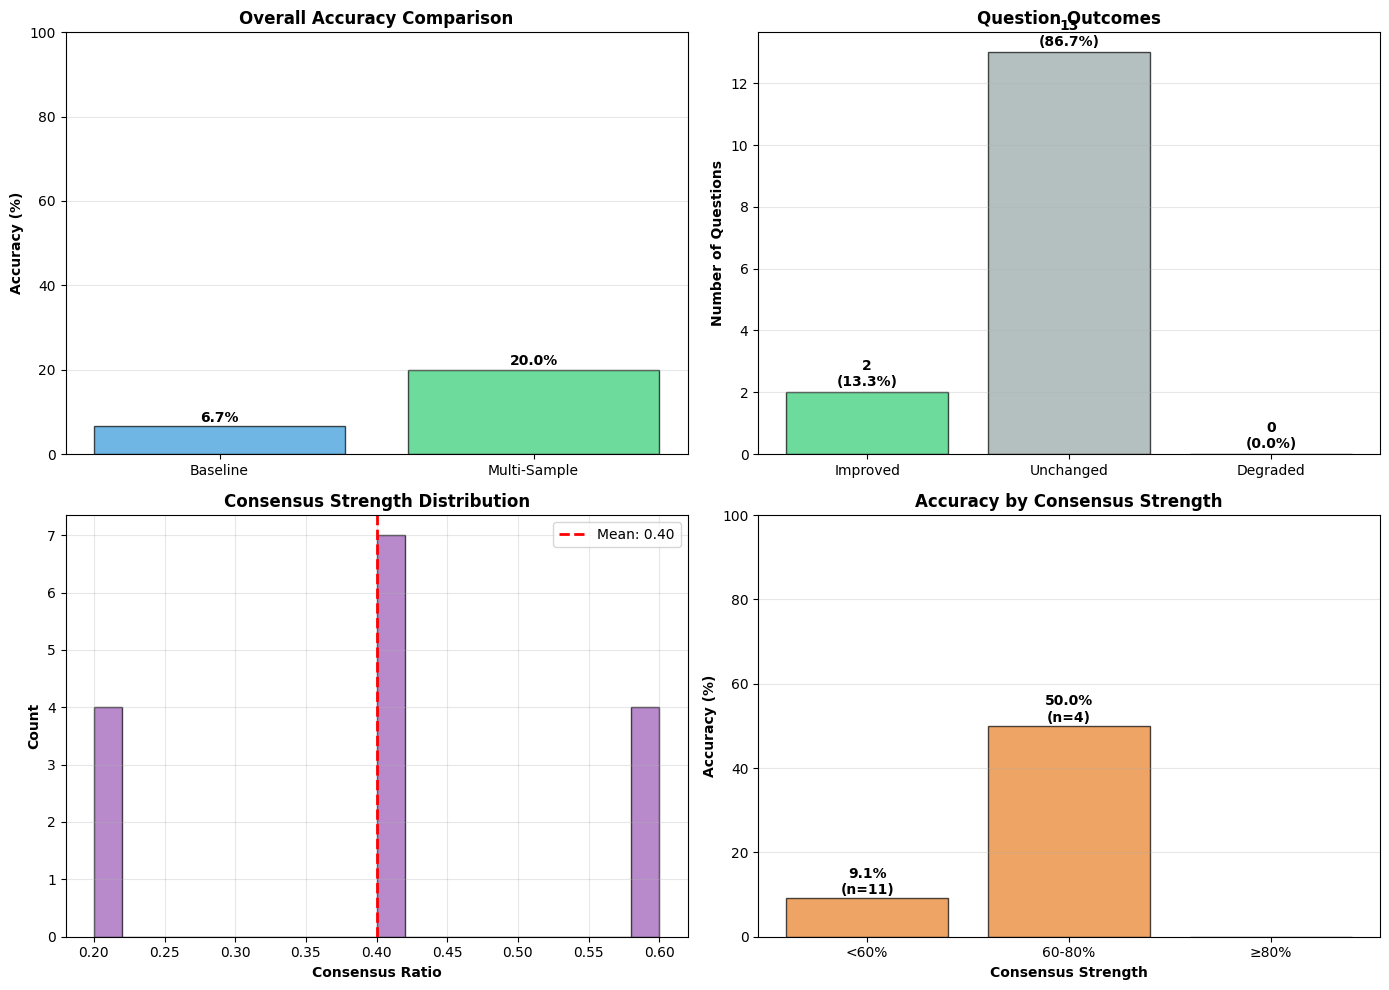


✓ Visualization complete


In [99]:
# Step 8: Visualization
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Overall comparison
ax1 = axes[0, 0]
approaches = ['Baseline', 'Multi-Sample']
accuracies = [accuracy_baseline, accuracy_multi]
colors = ['#3498db', '#2ecc71']
bars = ax1.bar(approaches, accuracies, color=colors, alpha=0.7, edgecolor='black')
ax1.set_ylabel('Accuracy (%)', fontweight='bold')
ax1.set_title('Overall Accuracy Comparison', fontweight='bold')
ax1.set_ylim([0, 100])
ax1.grid(axis='y', alpha=0.3)
for bar, acc in zip(bars, accuracies):
    ax1.text(bar.get_x() + bar.get_width()/2, acc + 1, f'{acc:.1f}%', 
             ha='center', fontweight='bold')

# Plot 2: Question outcomes
ax2 = axes[0, 1]
outcomes = ['Improved', 'Unchanged', 'Degraded']
counts = [num_improved, num_unchanged, num_degraded]
colors_out = ['#2ecc71', '#95a5a6', '#e74c3c']
bars = ax2.bar(outcomes, counts, color=colors_out, alpha=0.7, edgecolor='black')
ax2.set_ylabel('Number of Questions', fontweight='bold')
ax2.set_title('Question Outcomes', fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
for bar, count in zip(bars, counts):
    pct = count / len(results_multi) * 100
    ax2.text(bar.get_x() + bar.get_width()/2, count + 0.2, 
             f'{count}\n({pct:.1f}%)', ha='center', fontweight='bold')

# Plot 3: Consensus distribution
ax3 = axes[1, 0]
ax3.hist(results_multi['consensus_ratio'], bins=20, color='#9b59b6', 
         alpha=0.7, edgecolor='black')
ax3.set_xlabel('Consensus Ratio', fontweight='bold')
ax3.set_ylabel('Count', fontweight='bold')
ax3.set_title('Consensus Strength Distribution', fontweight='bold')
ax3.axvline(results_multi['consensus_ratio'].mean(), color='red', 
            linestyle='--', linewidth=2, 
            label=f'Mean: {results_multi["consensus_ratio"].mean():.2f}')
ax3.legend()
ax3.grid(alpha=0.3)

# Plot 4: Accuracy by consensus
ax4 = axes[1, 1]
consensus_cats = ['<60%', '60-80%', '≥80%']
consensus_accs = []
consensus_counts = []
for cat_data in [weak, medium, strong]:
    if len(cat_data) > 0:
        consensus_accs.append(cat_data['is_correct'].mean() * 100)
        consensus_counts.append(len(cat_data))
    else:
        consensus_accs.append(0)
        consensus_counts.append(0)

bars = ax4.bar(range(len(consensus_cats)), consensus_accs, color='#e67e22', 
               alpha=0.7, edgecolor='black')
ax4.set_xticks(range(len(consensus_cats)))
ax4.set_xticklabels(consensus_cats)
ax4.set_xlabel('Consensus Strength', fontweight='bold')
ax4.set_ylabel('Accuracy (%)', fontweight='bold')
ax4.set_title('Accuracy by Consensus Strength', fontweight='bold')
ax4.set_ylim([0, 100])
ax4.grid(axis='y', alpha=0.3)
for i, (acc, count) in enumerate(zip(consensus_accs, consensus_counts)):
    if count > 0:
        ax4.text(i, acc + 1, f'{acc:.1f}%\n(n={count})', 
                 ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✓ Visualization complete")

In [100]:
# Step 9: View detailed results
print("Detailed results dataframe available as 'results_multi'")
print(f"Shape: {results_multi.shape}")
print(f"\nColumns: {list(results_multi.columns)}")
print(f"\nSample (first 10 rows):")
results_multi.head(10)

Detailed results dataframe available as 'results_multi'
Shape: (15, 14)

Columns: ['question_idx', 'ground_truth', 'majority_answer', 'majority_count', 'total_samples', 'num_unique_answers', 'consensus_ratio', 'is_correct', 'predicted_difficulty', 'baseline_correct', 'improved', 'degraded', 'unchanged', 'difficulty_bin']

Sample (first 10 rows):


,question_idx,ground_truth,majority_answer,majority_count,total_samples,num_unique_answers,consensus_ratio,is_correct,predicted_difficulty,baseline_correct,improved,degraded,unchanged,difficulty_bin
0,0,70,"[70, '70']",3,5,2,0.6,1,0.166880,1,0,0,1,Very Hard
1,1,588,"[1008, '1008']",2,5,4,0.4,0,0.194431,0,0,0,1,Very Hard
2,2,16,"[764, '764']",2,5,4,0.4,0,0.327035,0,0,0,1,Hard
3,3,117,"[118, '118']",2,5,4,0.4,0,0.185571,0,0,0,1,Very Hard
4,4,279,"[38295, '38295']",1,5,5,0.2,0,0.301857,0,0,0,1,Hard
5,5,504,"[504, '504']",3,5,3,0.6,1,0.269317,0,1,0,0,Hard
6,6,821,"[12, '12']",3,5,3,0.6,0,0.423473,0,0,0,1,Hard
7,7,77,"[74, '74']",1,5,5,0.2,0,0.238689,0,0,0,1,Very Hard
8,8,62,"[62, '62']",2,5,4,0.4,1,0.308362,0,1,0,0,Hard
9,9,81,"[55, '55']",1,5,5,0.2,0,0.310884,0,0,0,1,Hard
